<a href="https://colab.research.google.com/github/Frankie0609/ECRP2/blob/main/Image_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Part 1 - Working with sample Approach - Import libraries

In [2]:
#!pip install cartopy

In [3]:
#!pip install metpy

In [4]:
#!pip install matplotlib==3.1.3

In [ ]:
import sys
import numpy as np
import netCDF4
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import os
from PIL import Image
import pandas as pd
from netCDF4 import Dataset
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
from cartopy.feature import NaturalEarthFeature
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.cluster import KMeans
from tqdm import tqdm
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

## Old Approach

In [ ]:
# Function to Extract features from the images
def image_feature(path, direc):
    model = InceptionV3(weights='imagenet', include_top=False)
    features = [];
    img_name = [];
    for i in tqdm(direc):
        fname=path + 'train'+'/'+i
        print(fname)
        img=image.load_img(fname,target_size=(224,224))
        x = img_to_array(img)
        x=np.expand_dims(x,axis=0)
        x=preprocess_input(x)
        feat=model.predict(x)
        feat=feat.flatten()
        features.append(feat)
        img_name.append(i)
    return features,img_name

In [ ]:
path='/content/drive/MyDrive/IS_801/ECRP/'
img_path=os.listdir('/content/drive/MyDrive/IS_801/ECRP/train')

In [ ]:
img_path
print(len(img_path))

736


In [5]:
#img_features, img_name = image_feature(path, img_path)

In [ ]:
k = 2
clusters = KMeans(k, random_state = 40)
clusters.fit(img_features)

KMeans(n_clusters=2, random_state=40)

In [6]:
#image_cluster = pd.DataFrame(img_name,columns=['image'])
#image_cluster["clusterid"] = clusters.labels_
#image_cluster # 0 denotes cat and 1 denotes dog

In [7]:
#image_cluster[(image_cluster[["clusterid"]].values == 1)] # some cats were misclassified as dogs

In [8]:
#image_cluster[(image_cluster[["clusterid"]].values == 0)]

## Transforming netCDF data to image data

In [ ]:
data = xr.open_dataset("/content/drive/MyDrive/ECRP_Data_Science/Image_Feature_Extraction_Cluster/ERA5_sample_hourly_20200201-20200331.nc")
data

<xarray.Dataset>
Dimensions:    (latitude: 161, longitude: 201, time: 1440)
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 50.5 50.25 50.0
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 29.5 29.75 30.0
  * time       (time) datetime64[ns] 2020-02-01 ... 2020-03-31T23:00:00
Data variables:
    skt        (time, latitude, longitude) float32 ...
    slhf       (time, latitude, longitude) float32 ...
    sp         (time, latitude, longitude) float32 ...
    sshf       (time, latitude, longitude) float32 ...
    t2m        (time, latitude, longitude) float32 ...
    u10        (time, latitude, longitude) float32 ...
    v10        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      Tue Jan  4 16:00:54 2022: ncks -v slhf,sshf,skt,sp,u10,v10,...
    NCO:          netCDF Operators version 5.0.3 (Homepage = http://nco.sf.ne...

In [ ]:
skt = data.skt

In [ ]:
#time = data['skt'].metpy.time
skt.time

<xarray.DataArray 'time' (time: 1440)>
array(['2020-02-01T00:00:00.000000000', '2020-02-01T01:00:00.000000000',
       '2020-02-01T02:00:00.000000000', ..., '2020-03-31T21:00:00.000000000',
       '2020-03-31T22:00:00.000000000', '2020-03-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2020-02-01 ... 2020-03-31T23:00:00
Attributes:
    long_name:  time

In [ ]:
y = skt.latitude #reading lattitudes
x = skt.longitude #reading longitude
print((y.size), (x.size))
skt_0 = skt.isel(time = 0)
#skt_0 = skt.sel(time = '2020-02-01T00:00:00.000000000')
skt_0

161 201


<xarray.DataArray 'skt' (latitude: 161, longitude: 201)>
array([[242.69978, 242.69978, 242.69978, ..., 242.69978, 242.69978, 242.69978],
       [242.22882, 242.23242, 242.23483, ..., 242.74303, 242.74664, 242.75024],
       [241.76387, 241.76749, 241.77348, ..., 242.86798, 242.87279, 242.87878],
       ...,
       [284.25433, 284.19788, 284.14862, ..., 275.1488 , 274.97943, 274.7031 ],
       [284.18347, 284.15704, 284.15222, ..., 275.6258 , 275.40472, 275.1524 ],
       [284.14502, 284.18585, 284.18225, ..., 275.94775, 275.7255 , 275.58853]],
      dtype=float32)
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 50.5 50.25 50.0
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 29.5 29.75 30.0
    time       datetime64[ns] 2020-02-01
Attributes:
    units:      K
    long_name:  Skin temperature

In [ ]:
"""

#imshow ==> it'll show the image
#extent ==> figure corners (we already read long and lat as x,y and from there we are giving corners
#cmap ==> colourmap ( I prefer 'jet' because it's more vibrant
#origin ==> from where figure start to show


fig = plt.figure(figsize=(161, 201))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.LambertConformal(central_longitude=-96.0, central_latitude=39.0,
                                                               false_easting=0.0, false_northing=0.0, secant_latitudes=None,
                                                               standard_parallels=None, globe=None, cutoff=-30)) #adding projection within the opened figure, note

#cartopy.crs.LambertConformal(central_longitude=-96.0, central_latitude=39.0, false_easting=0.0, false_northing=0.0, secant_latitudes=None, standard_parallels=None, globe=None, cutoff=-30

mp = ax.imshow(skt_0-273.5,extent=(x.min(),x.max(), y.min(), y.max()),cmap='jet', origin='lower')


#plt.title('SKT_' + i, fontsize=12)
plt.title('Skin Temperature', fontsize=12)
#plt.xlabel('x')
#plt.ylabel('y')


"""

"""
#these are additional features you can add to geo plots (like boders, rivers, lakes..etc)
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='blue')
ax.add_feature(states_provinces, edgecolor='blue')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)

"""

"""
# adding colorbar and adjust the size
cbar = fig.colorbar(mp, shrink=0.4)
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=1)
gl.top_labels = True
gl.right_labels = True

plt.savefig('/content/drive/MyDrive/ECRP_Data_Science/Image_Feature_Extraction_Cluster/NetCDF Images/SKT_0.jpg', dpi=10)

"""

"\n# adding colorbar and adjust the size\ncbar = fig.colorbar(mp, shrink=0.4)\ncbar.minorticks_on()\n\n#adding the long lat grids and enabling the tick labels\ngl = ax.gridlines(draw_labels=True,alpha=1)\ngl.top_labels = True\ngl.right_labels = True\n\nplt.savefig('/content/drive/MyDrive/ECRP_Data_Science/Image_Feature_Extraction_Cluster/NetCDF Images/SKT_0.jpg', dpi=10)\n\n"

In [ ]:
skt = data.variables['skt'][::10,::10][10]
slhf = data.variables['slhf'][::10,::10][10]
sp = data.variables['sp'][::10,::10][10]
sshf = data.variables['sshf'][::10,::10][10]
t2m = data.variables['t2m'][::10,::10][10]
u10 = data.variables['u10'][::10,::10][10]
v10 = data.variables['v10'][::10,::10][10]

In [ ]:
from PIL import Image

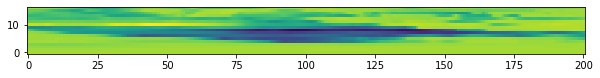

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(slhf,origin='lower')
plt.savefig('slhf.png', bbox_inches=0)

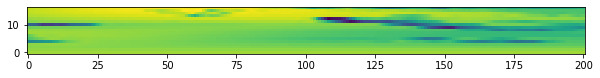

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(sp,origin='lower')
plt.savefig('sp.png', bbox_inches=0)

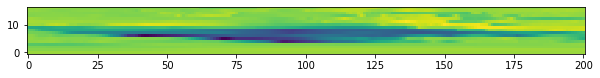

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(sshf,origin='lower')
plt.savefig('sshf.png', bbox_inches=0)

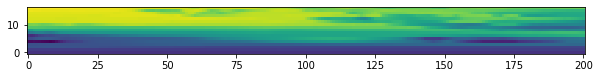

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(t2m,origin='lower')
plt.savefig('t2m.png', bbox_inches=0)

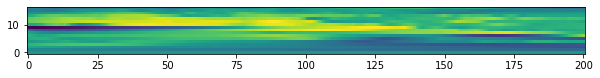

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(u10,origin='lower')
plt.savefig('u10.png', bbox_inches=0)

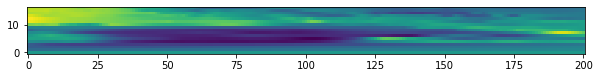

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(v10,origin='lower')
plt.savefig('v10.png', bbox_inches=0)

In [ ]:
print(os.listdir())

['.config', 'u10.png', 'v10.png', 'sshf.png', 'slhf.png', 'sp.png', 'drive', 't2m.png', 'sample_data']


In [ ]:
skt = data.skt

In [ ]:
y = skt.latitude #reading lattitudes
x = skt.longitude #reading longitude
print((y.size), (x.size))
skt_0 = skt.isel(time = 0)
#skt_0 = skt.sel(time = '2020-02-01T00:00:00.000000000')
skt_0

161 201


<xarray.DataArray 'skt' (latitude: 161, longitude: 201)>
array([[242.69978, 242.69978, 242.69978, ..., 242.69978, 242.69978, 242.69978],
       [242.22882, 242.23242, 242.23483, ..., 242.74303, 242.74664, 242.75024],
       [241.76387, 241.76749, 241.77348, ..., 242.86798, 242.87279, 242.87878],
       ...,
       [284.25433, 284.19788, 284.14862, ..., 275.1488 , 274.97943, 274.7031 ],
       [284.18347, 284.15704, 284.15222, ..., 275.6258 , 275.40472, 275.1524 ],
       [284.14502, 284.18585, 284.18225, ..., 275.94775, 275.7255 , 275.58853]],
      dtype=float32)
Coordinates:
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... 50.5 50.25 50.0
  * longitude  (longitude) float32 -20.0 -19.75 -19.5 -19.25 ... 29.5 29.75 30.0
    time       datetime64[ns] 2020-02-01
Attributes:
    units:      K
    long_name:  Skin temperature

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces_lines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__in

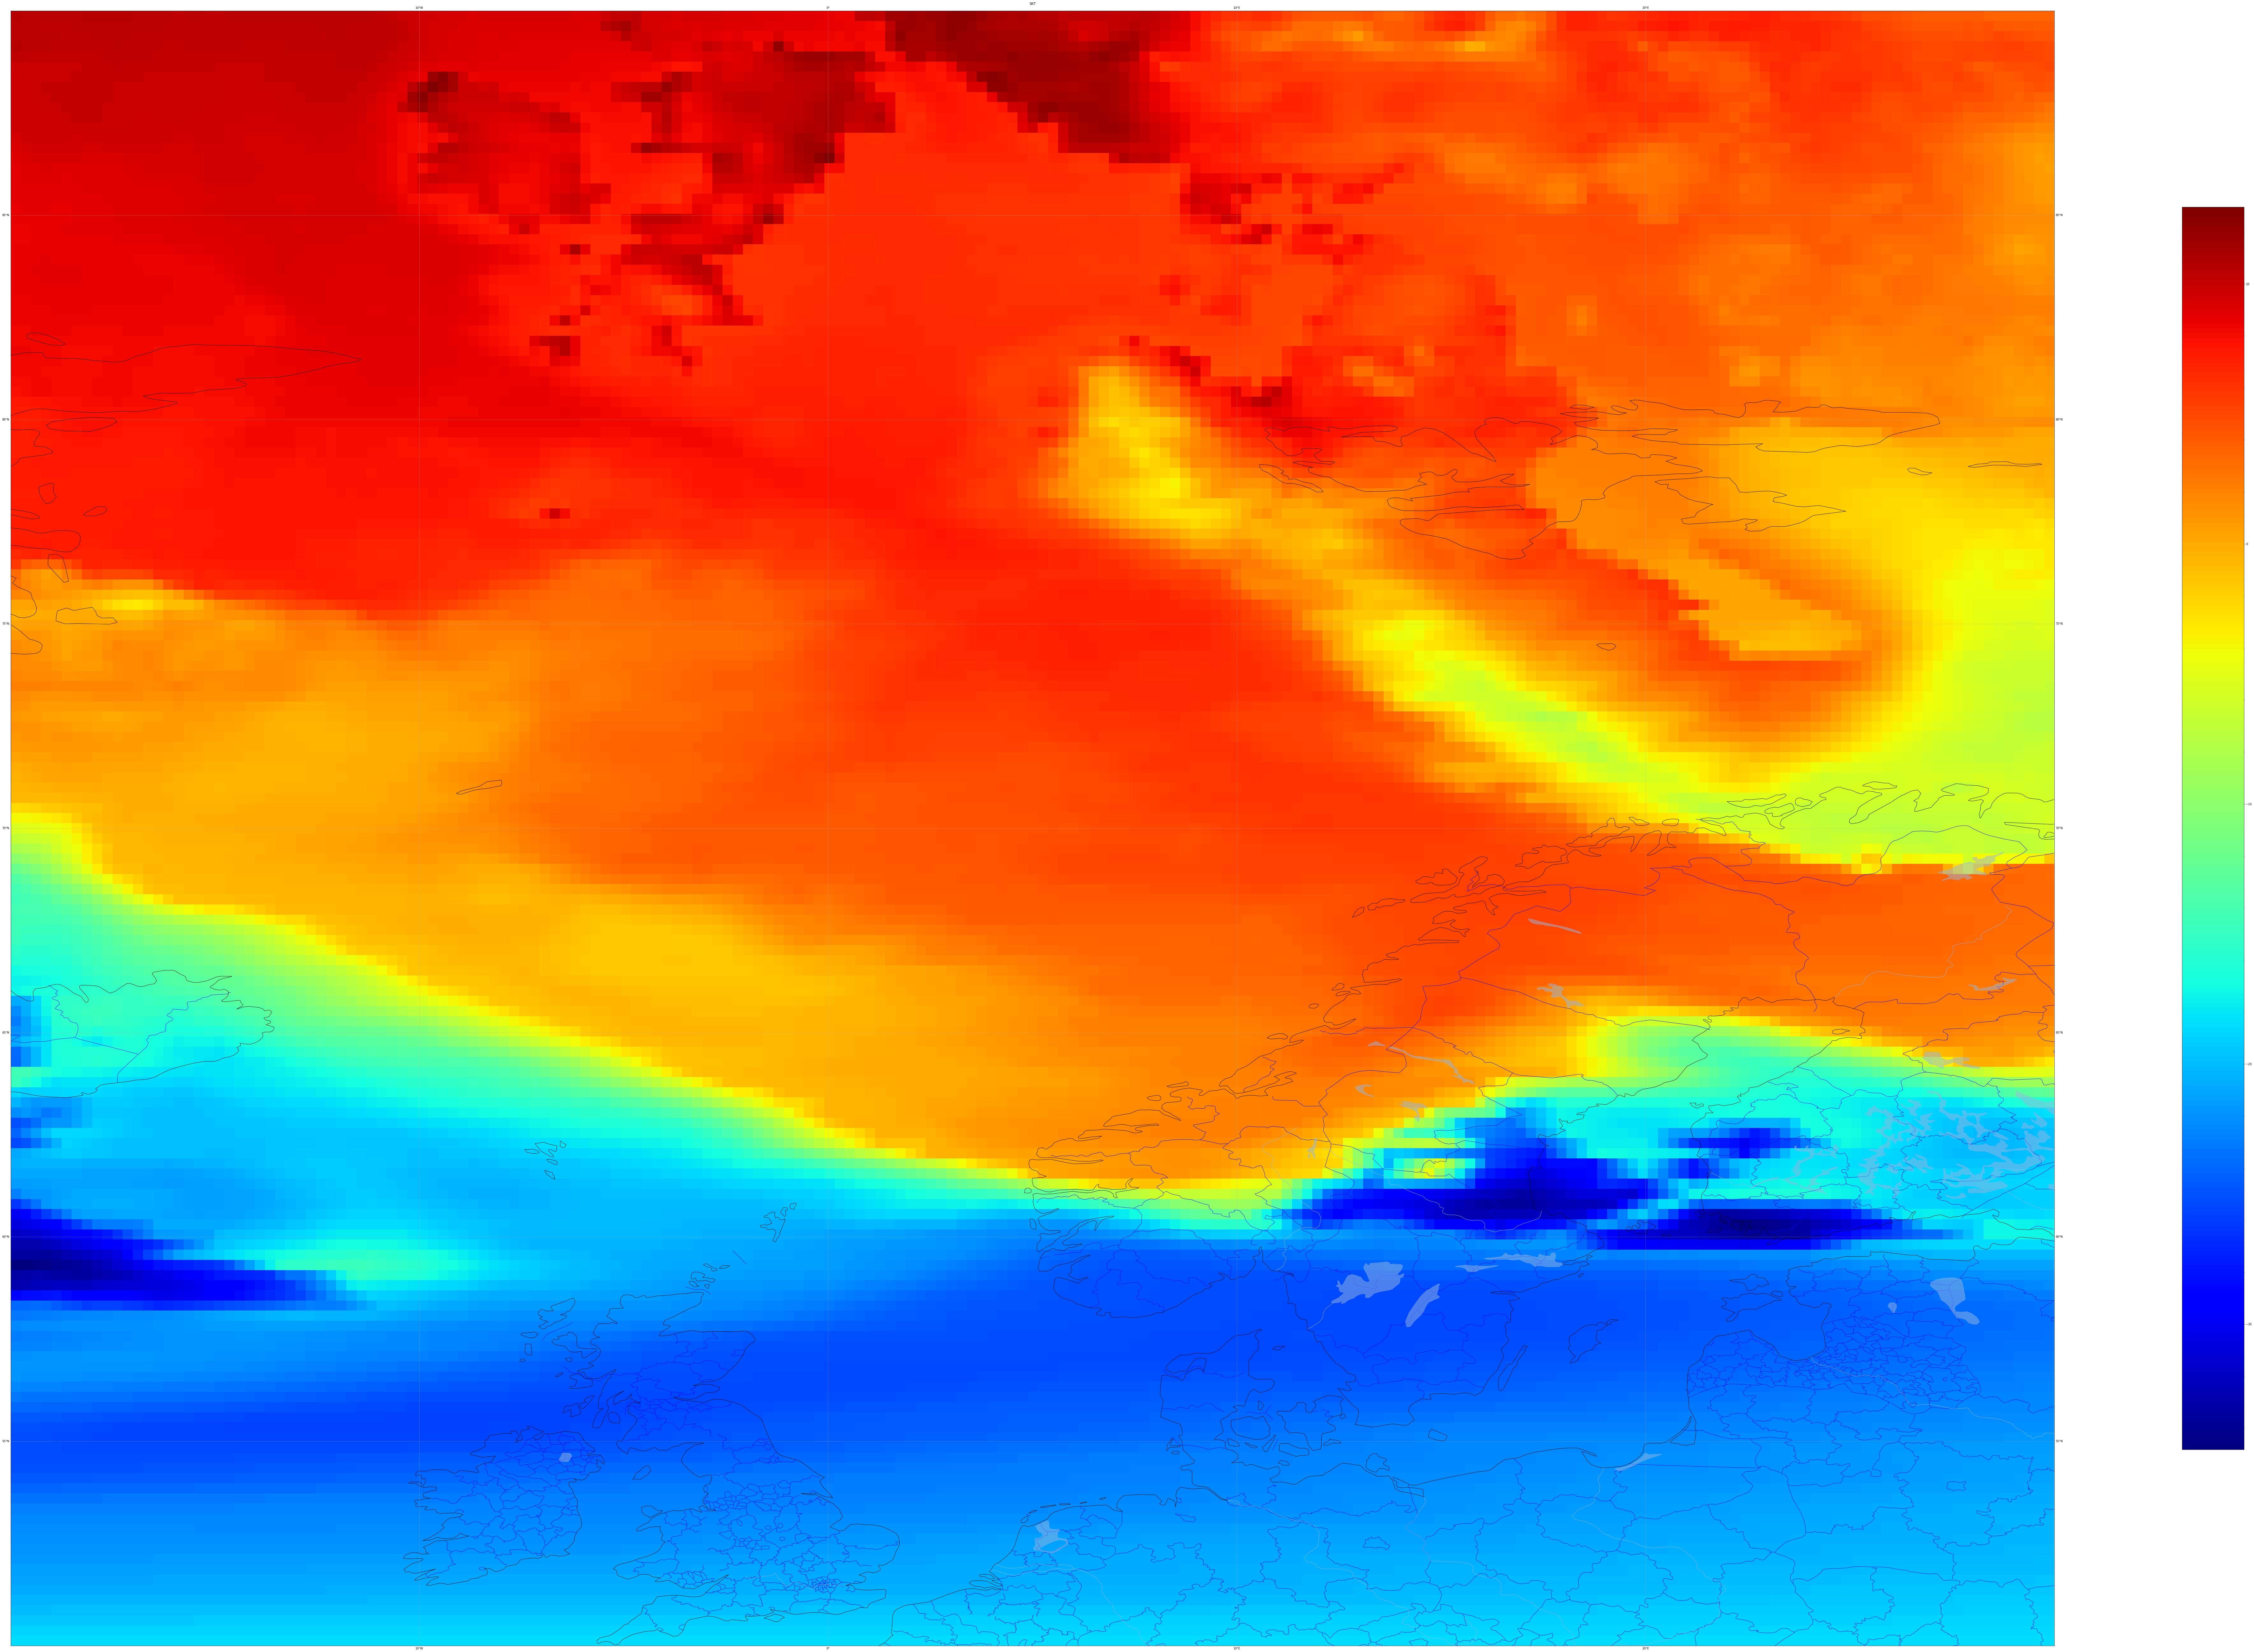

In [ ]:
skt_1430 = skt.isel(time = 1430)

fig = plt.figure(figsize=(161, 201))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) #adding project within the opened figure

mp = ax.imshow(skt_1430-273.5,extent=(x.min(),x.max(), y.min(), y.max()),cmap='jet', origin='lower')


#plt.title('SKT_' + i, fontsize=12)
plt.title('SKT', fontsize=12)
plt.xlabel('x')
plt.ylabel('y')

#these are additional features you can add to geo plots (like boders, rivers, lakes..etc)
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='blue')
ax.add_feature(states_provinces, edgecolor='blue')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)


# adding colorbar and adjust the size
cbar = fig.colorbar(mp, shrink=0.4)
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.5)
gl.top_labels = True
gl.right_labels = True

plt.show()

#plt.savefig('/content/drive/MyDrive/ECRP_Data_Science/Image_Feature_Extraction_Cluster/NetCDF Images/skt_1430.jpg' ,dpi=10)

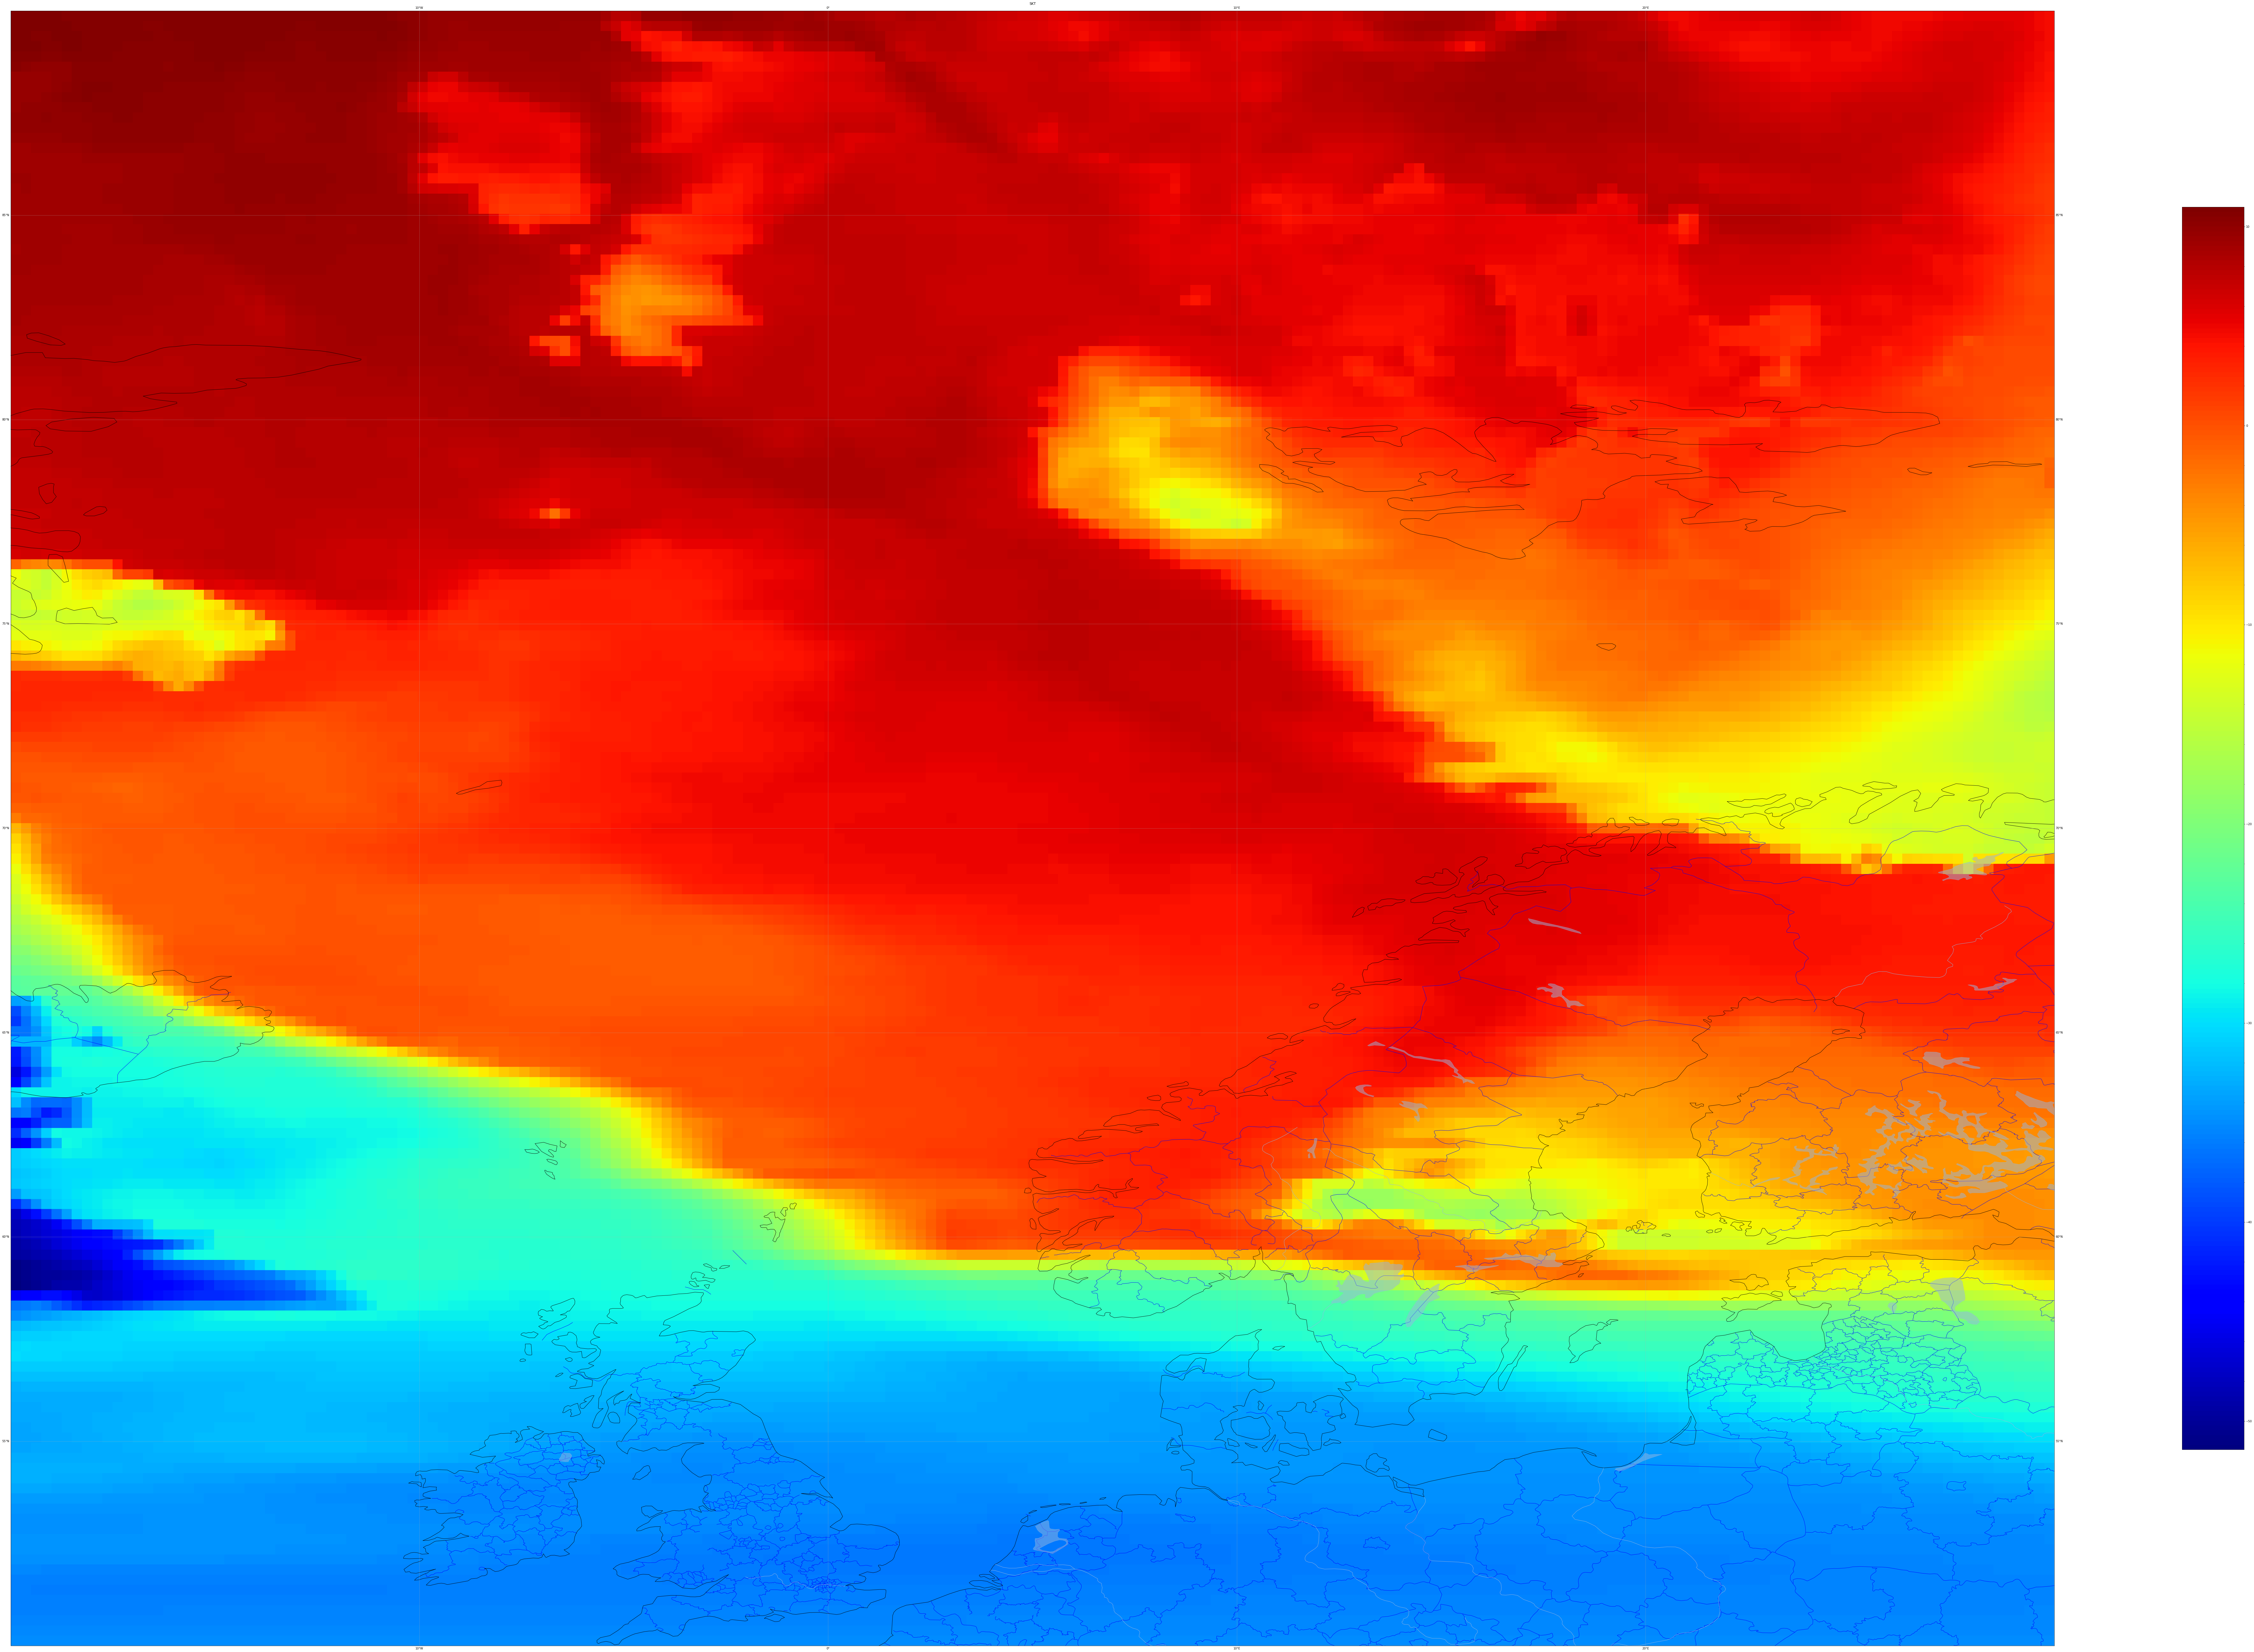

In [ ]:
skt_20 = skt.isel(time = 20)

fig = plt.figure(figsize=(161, 201))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) #adding project within the opened figure

mp = ax.imshow(skt_20-273.5,extent=(x.min(),x.max(), y.min(), y.max()),cmap='jet', origin='lower')


#plt.title('SKT_' + i, fontsize=12)
plt.title('SKT', fontsize=12)
plt.xlabel('x')
plt.ylabel('y')

#these are additional features you can add to geo plots (like boders, rivers, lakes..etc)
states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='10m',
        facecolor='none')
ax.add_feature(cfeature.BORDERS,edgecolor='blue')
ax.add_feature(states_provinces, edgecolor='blue')
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)


# adding colorbar and adjust the size
cbar = fig.colorbar(mp, shrink=0.4)
cbar.minorticks_on()

#adding the long lat grids and enabling the tick labels
gl = ax.gridlines(draw_labels=True,alpha=0.5)
gl.top_labels = True
gl.right_labels = True

plt.show()
#plt.savefig('/content/drive/MyDrive/ECRP_Data_Science/Image_Feature_Extraction_Cluster/NetCDF Images/SKT_20.jpg' ,dpi=10)

In [ ]:
#Code to save the images with assistance from Dr. Wang

"""


def image_feature(path, direc):
    model = InceptionV3(weights='imagenet', include_top=False)
    features = [];
    img_name = [];
    for i in tqdm(direc):
        fname=path + 'train'+'/'+i
        print(fname)
        img=image.load_img(fname)
        x = img_to_array(img)
        x=np.expand_dims(x,axis=0)
        x=preprocess_input(x)
        feat=model.predict(x)
        feat=feat.flatten()
        features.append(feat)
        img_name.append(i)
    return features,img_name

def image_saving(data_variable, saving_path):
        path = saving_path + "/" + data_variable._name
        print("creating path:" + path)
        os.makedirs(path, exist_ok=True)
        for index in range(data_variable.time.size):
                one_day_variable = data_variable.isel(time=index)
                fig = plt.figure(figsize=(161, 201))
                ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) #adding project within the opened figure
                mp = ax.imshow(one_day_variable-273.5,extent=(one_day_variable.longitude.min(),one_day_variable.longitude.max(), one_day_variable.latitude.min(), one_day_variable.latitude.max()),cmap='jet', origin='lower')
                plt.xlabel('x')
                plt.ylabel('y')

                #these are additional features you can add to geo plots (like boders, rivers, lakes..etc)
                states_provinces = cfeature.NaturalEarthFeature(
                        category='cultural',
                        name='admin_1_states_provinces_lines',
                        scale='10m',
                        facecolor='none')
                ax.add_feature(cfeature.BORDERS,edgecolor='blue')
                ax.add_feature(states_provinces, edgecolor='blue')
                ax.add_feature(cfeature.LAND)
                ax.add_feature(cfeature.COASTLINE)
                ax.add_feature(cfeature.OCEAN)
                ax.add_feature(cfeature.LAKES, alpha=0.5)
                ax.add_feature(cfeature.RIVERS)

                # adding colorbar and adjust the size
                # cbar = fig.colorbar(mp, shrink=0.4)
                # cbar.minorticks_on()

                #adding the long lat grids and enabling the tick labels
                gl = ax.gridlines(draw_labels=True,alpha=0.5)
                gl.top_labels = True
                gl.right_labels = True

                plt.savefig(path + "/" + data_variable._name + "_" + str(index) + ".jpg", dpi=10, bbox_inches='tight')
                plt.clf()
                plt.close(fig)


if __name__ == '__main__':
        data = xr.open_dataset("/Users/jianwu/Data/ECRP_ERA5/ERA5_sample_hourly_20200201-20200331.nc")
        print(data.data_vars)
        image_saving(data['t2m'], "/Users/jianwu/Data/ECRP_ERA5/")
        #for data_key in data.data_vars:
        #        image_saving(data[data_key], "/Users/jianwu/Data/ECRP_ERA5/")

"""

'\n\n\ndef image_feature(path, direc):\n    model = InceptionV3(weights=\'imagenet\', include_top=False)\n    features = [];\n    img_name = [];\n    for i in tqdm(direc):\n        fname=path + \'train\'+\'/\'+i\n        print(fname)\n        img=image.load_img(fname)\n        x = img_to_array(img)\n        x=np.expand_dims(x,axis=0)\n        x=preprocess_input(x)\n        feat=model.predict(x)\n        feat=feat.flatten()\n        features.append(feat)\n        img_name.append(i)\n    return features,img_name\n\ndef image_saving(data_variable, saving_path):\n        path = saving_path + "/" + data_variable._name\n        print("creating path:" + path)\n        os.makedirs(path, exist_ok=True)\n        for index in range(data_variable.time.size):\n                one_day_variable = data_variable.isel(time=index)\n                fig = plt.figure(figsize=(161, 201))\n                ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree()) #adding project within the opened figure\n  